# Analysis of white matter moderation effects on the relationship between age and working memory scores

The aim of this analysis is to investigate how the development of indicators of brain maturation (in this case FA) relates to increases in working memory factors with age. In order to establish a moderation effect, three conditions have to be met:
- Age and working memory factors are associated
- Age and Thickness are associated
- Thickness and working memory factors are associated
- Age is a moderator of the relationship between thickness and working memory factors

In [1]:
# Setting the working directory
setwd('/Users/joebathelt1/Documents/Projects/CALM_WorkingMemory/')

In [2]:
# Loading the required packages
require(plyr)
require(ggplot2)
require(lavaan)
require(reshape2)
library(extrafont)
require(xtable)
require(IRdisplay)
require(repr)
require(psych)

Loading required package: plyr
Warning message:
: package ‘plyr’ was built under R version 3.2.5Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4Loading required package: lavaan
This is lavaan 0.5-20
lavaan is BETA software! Please report any bugs.
Loading required package: reshape2
Registering fonts with R
Loading required package: xtable
Loading required package: IRdisplay

Attaching package: ‘IRdisplay’

The following object is masked from ‘package:xtable’:

    display

Loading required package: repr
Loading required package: psych

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



## 1. Establishing the relationship between Age and working memory factors
First, we need to establish the relationship between Age and the working memory factors that were based on working memory raw scores. To this end, I used a regression model with the working memory factor as the outcome and Age as the predictor - Gender is included as a nuisance regressor. Regression model:
$$Y_{FactorScore} = \beta_{Age}X_{Age} + \beta_{Gender}X_{Gender} + \beta_{Intercept} + \epsilon$$

In [3]:
data <- read.csv("CorticalThickness_results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
data <- merge(data,behavioural_data,by="MRI.ID")
data$Age_in_months <- scale(data$Age_in_months)

summary(lm(RC1 ~ Age_in_months + factor(Gender) + 1, data=data))
summary(lm(RC2 ~ Age_in_months + factor(Gender) + 1, data=data))
summary(lm(RC3 ~ Age_in_months + factor(Gender) + 1, data=data))


Call:
lm(formula = RC1 ~ Age_in_months + factor(Gender) + 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.81525 -0.64642 -0.04533  0.59937  2.16410 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -0.48398    0.15366  -3.150  0.00218 **
Age_in_months    0.21190    0.08788   2.411  0.01780 * 
factor(Gender)1  0.47100    0.18694   2.520  0.01340 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8677 on 96 degrees of freedom
Multiple R-squared:  0.1201,	Adjusted R-squared:  0.1018 
F-statistic: 6.551 on 2 and 96 DF,  p-value: 0.002152



Call:
lm(formula = RC2 ~ Age_in_months + factor(Gender) + 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2981 -0.7265 -0.1152  0.7277  3.4105 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -0.14677    0.19164  -0.766   0.4456  
Age_in_months    0.27868    0.10960   2.543   0.0126 *
factor(Gender)1  0.08032    0.23314   0.344   0.7312  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.082 on 96 degrees of freedom
Multiple R-squared:  0.06565,	Adjusted R-squared:  0.04618 
F-statistic: 3.372 on 2 and 96 DF,  p-value: 0.03842



Call:
lm(formula = RC3 ~ Age_in_months + factor(Gender) + 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.09300 -0.66483  0.04774  0.61310  1.84619 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.23244    0.15151  -1.534    0.128    
Age_in_months    0.36544    0.08665   4.217  5.6e-05 ***
factor(Gender)1  0.14808    0.18433   0.803    0.424    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8556 on 96 degrees of freedom
Multiple R-squared:  0.1653,	Adjusted R-squared:  0.1479 
F-statistic: 9.508 on 2 and 96 DF,  p-value: 0.0001708


**These results indicate that age significantly predictors working memory scores for all factors.**


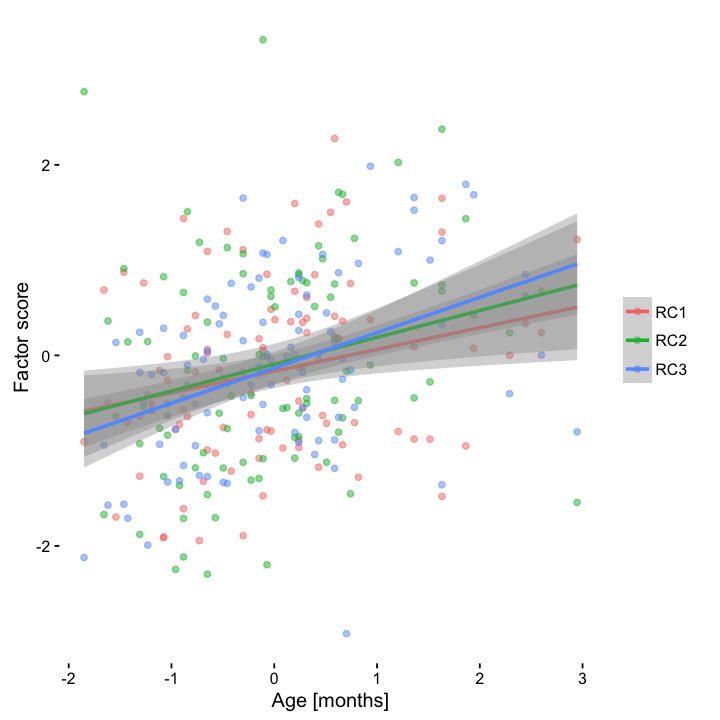

In [4]:
plotting_data <- data[,c('RC1','RC2','RC3','Age_in_months')]
plotting_data <- melt(plotting_data, id=c('Age_in_months'))

options(repr.plot.width=6, repr.plot.height=6)
ggplot(plotting_data,aes(x=Age_in_months, y=value, colour=factor(variable))) +
       geom_point(alpha=0.5) +
       stat_smooth(method='lm') + 
       xlab('Age [months]') + ylab('Factor score') +
       theme_classic() +
       theme(legend.title = element_blank())

## 2. Establishing the relationship between Age and cortical thickness
Next, we need to see if age is influencing white matter, i.e. FA. This is done by running regression models for each eigenanatomy component and then correcting the resulting p-values for multiple comparisons. Regression model:
$$y_{Age}=\beta_{Thickness}X_{Thickness}+\beta_{Gender}X_{Gender}+ \beta_{ICV}X_{ICV} + \beta_{Intercept}+\epsilon$$

 


In [5]:
data <- read.csv("CorticalThickness_results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
volume_data <- read.csv('ICVs.csv')
volume_data <- volume_data[,c('MRI.ID','ICV')]
data <- merge(data,behavioural_data,by="MRI.ID")
data <- merge(data, volume_data,by='MRI.ID')

data <- melt(data, id=c("MRI.ID","ICV","Eigenanatomy_eanat","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "Thickness"))

# Scaling the data to z-scores 
data$Age_in_months <- scale(data$Age_in_months)
data$Thickness <- scale(data$Thickness)

Age_effect <- c()
Age_effect_tstat <- c()
Age_beta <- c()

for (i in 1:32){
    dat <- subset(data, data$component == paste('EigenanatomyComp',i,sep=""))
    Age_effect <- c(Age_effect, summary(lm(Thickness ~ Age_in_months + factor(Gender) + ICV, data=dat))$coefficients[2,4])
    Age_effect_tstat <- c(Age_effect_tstat, summary(lm(Thickness ~ Age_in_months + factor(Gender) +ICV, data=dat))$coefficients[2,3])
    Age_beta <- c(Age_beta, summary(lm(Thickness ~ Age_in_months + Gender + ICV, data=dat))$coefficients[2,1])
}

# Get the effect of age after correcting for multiple comparisons 
Age_effect_corrected <- p.adjust(Age_effect, method='bonferroni')

# Creating a dataframe that only contains the significant components
dat <- data[data$component %in% levels(data$component)[which(Age_effect < 0.05)],]

# Create a table with results
df <- data.frame(Age_effect_tstat, Age_effect, Age_effect_corrected)
#df <- data.frame(levels(data$component)[Age_effect_corrected < 0.05], Age_effect_tstat[Age_effect_corrected < 0.05], Age_effect[Age_effect_corrected < 0.05], Age_effect_corrected[Age_effect_corrected < 0.05])
df <- data.frame(levels(data$component), Age_effect_tstat, Age_effect, Age_effect_corrected)
colnames(df) <- c('component','t-statistic','p-value','corrected p')
table <- xtable(x = df, digits=c(0,0,2,3,3))

Warning message:
: Removed 86 rows containing non-finite values (stat_smooth).Warning message:
: Removed 86 rows containing missing values (geom_point).

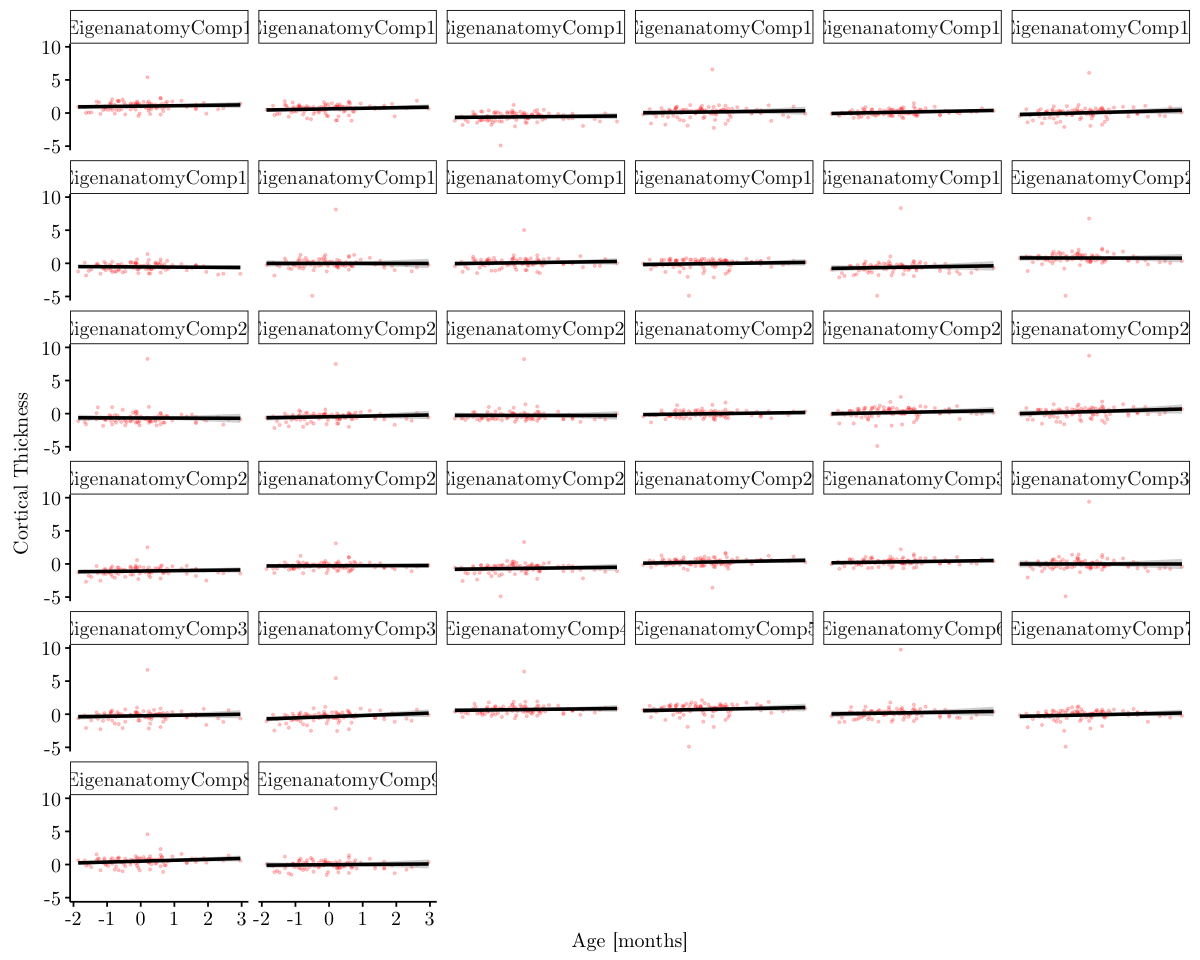

In [6]:
# Plot age vs FA for all the significant components 
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data, aes(x=Age_in_months, y=Thickness)) +
    geom_point(colour='red',size=0.5, alpha=0.2) + 
    stat_smooth(method='lm', colour='black', size=1) +
    xlab('Age [months]') + 
    ylab('Cortical Thickness') +
    theme_classic() +
    theme(legend.position = 'right',
          text=element_text(size=12, family="CMU Serif"),
          legend.title = element_text(size=12, face='bold'),
          axis.text = element_text(size=12),
          axis.title = element_text(size=12, face='bold'),
          strip.text = element_text(size=12, face='bold'),
          axis.line.x = element_line(colour="black", size=0.5),
          axis.line.y = element_line(colour="black", size=0.5)) +
    facet_wrap(~component)

## 3. Establishing the relationship between thickness and working memory factors
Now, we investigate the relationship between FA and working memory scores. This model uses working memory factor as the outcome and FA as the predictor. Gender is again included as a nuisance regressor. The regression model:
$$y_{Factor} = \beta_{Thickness}X_{Thickness} + \beta_{ICV}X_{ICV} + \beta_{Gender}X_{Gender} + \beta_{Intercept} + \epsilon$$

In [8]:
data <- read.csv("CorticalThickness_results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
volume_data <- read.csv('ICVs.csv')
volume_data <- volume_data[,c('MRI.ID','ICV')]
data <- merge(data,behavioural_data,by="MRI.ID")
data <- merge(data, volume_data,by='MRI.ID')

data <- melt(data, id=c("MRI.ID","ICV","Eigenanatomy_eanat","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "Thickness"))

# Scaling the data to z-scores 
data$Age_in_months <- scale(data$Age_in_months)
data$Thickness <- scale(data$Thickness)

# Analysis of moderation effects
RC1_Thickness <- c()
RC2_Thickness <- c()
RC3_Thickness <- c()

RC1_tstat <- c()
RC2_tstat <- c()
RC3_tstat <- c()

for (i in 1:32){
    dat <- subset(data, data$component == paste('EigenanatomyComp',i,sep=""))
    
    RC1_Thickness <- c(RC1_Thickness, summary(lm(RC1 ~ Gender + Thickness, data=dat))$coefficients[3,4])
    RC2_Thickness <- c(RC2_Thickness, summary(lm(RC2 ~ Gender + Thickness, data=dat))$coefficients[3,4])
    RC3_Thickness <- c(RC3_Thickness, summary(lm(RC3 ~ Gender + Thickness, data=dat))$coefficients[3,4])
    
    RC1_tstat <- c(RC1_tstat, summary(lm(RC1 ~ Gender + Thickness, data=dat))$coefficients[3,3])
    RC2_tstat <- c(RC2_tstat, summary(lm(RC2 ~ Gender + Thickness, data=dat))$coefficients[3,3])
    RC3_tstat <- c(RC3_tstat, summary(lm(RC3 ~ Gender + Thickness, data=dat))$coefficients[3,3])
}

# Bonferroni correction for multiple comparisons
RC1_Thickness_corrected <- p.adjust(RC1_Thickness, method='bonferroni')
RC2_Thickness_corrected <- p.adjust(RC2_Thickness, method='bonferroni')
RC3_Thickness_corrected <- p.adjust(RC3_Thickness, method='bonferroni')

dat <- data[data$component %in% levels(data$component)[which(RC3_Thickness_corrected < 0.05)],]
#df <- data.frame(levels(data$component)[RC2_Thickness_corrected < 0.05], RC2_tstat[RC2_Thickness_corrected < 0.05], RC2_Thickness[RC2_Thickness_corrected < 0.05], RC2_Thickness_corrected[RC2_Thickness_corrected < 0.05])
df <- data.frame(levels(data$component), RC2_tstat, RC2_Thickness, RC2_Thickness_corrected)
colnames(df) <- c('component','t-statistic','p-value','corrected p')
table <- xtable(x = df, digits=c(0,0,2,3,3))

Warning message:
: Removed 86 rows containing non-finite values (stat_smooth).Warning message:
: Removed 86 rows containing missing values (geom_point).

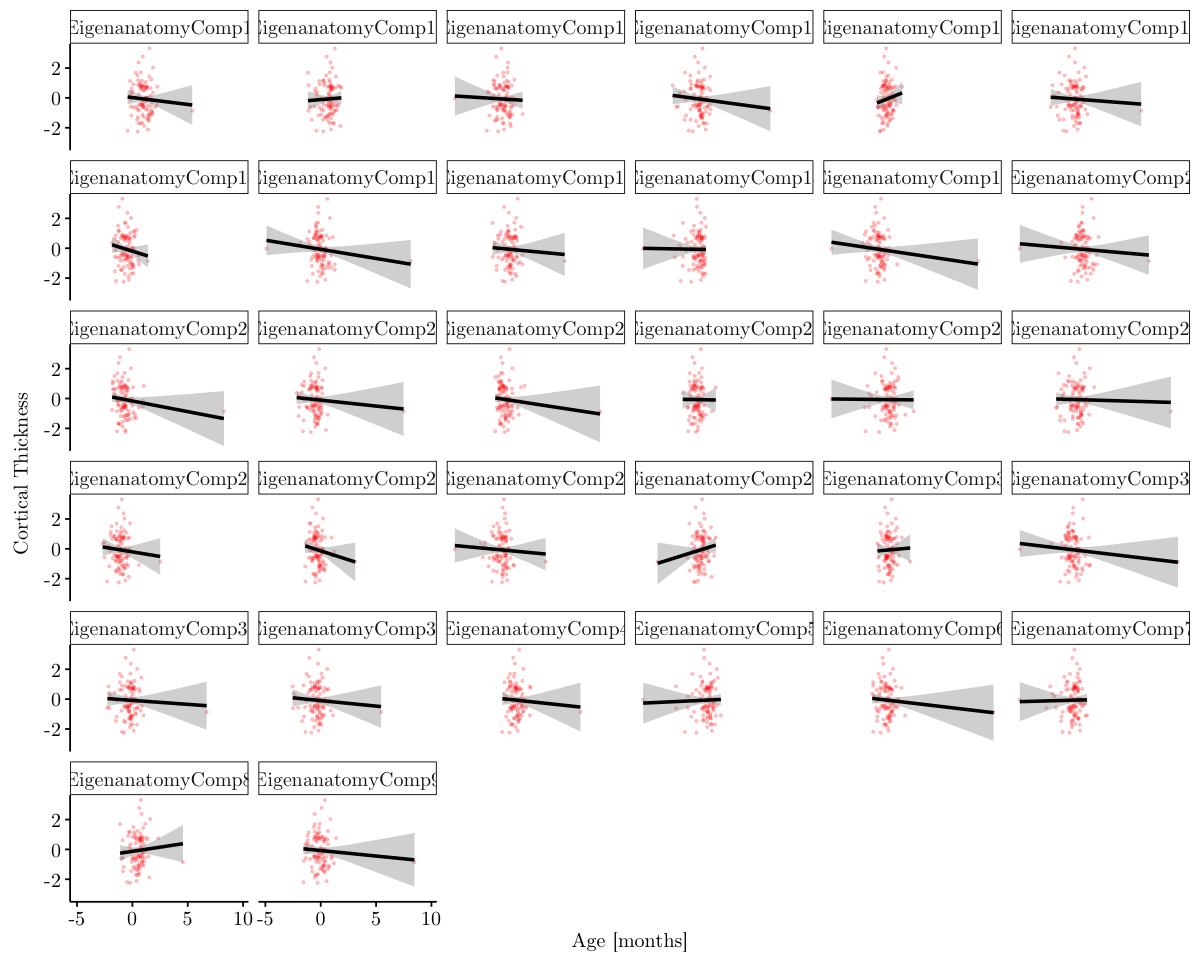

In [9]:
# Plot age vs Thickness for all the significant components 
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data, aes(x=Thickness, y=RC2)) +
    geom_point(colour='red',size=0.5, alpha=0.2) + 
    stat_smooth(method='lm', colour='black', size=1) +
    xlab('Age [months]') + 
    ylab('Cortical Thickness') +
    theme_classic() +
    theme(legend.position = 'right',
          text=element_text(size=12, family="CMU Serif"),
          legend.title = element_text(size=12, face='bold'),
          axis.text = element_text(size=12),
          axis.title = element_text(size=12, face='bold'),
          strip.text = element_text(size=12, face='bold'),
          axis.line.x = element_line(colour="black", size=0.5),
          axis.line.y = element_line(colour="black", size=0.5)) +
    facet_wrap(~component)

## 4. Moderation effect of CT for the relationship between Age and Working Memory factors

In [11]:
data <- read.csv("CorticalThickness_results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
volume_data <- read.csv('ICVs.csv')
volume_data <- volume_data[,c('MRI.ID','ICV')]
data <- merge(data,behavioural_data,by="MRI.ID")
data <- merge(data, volume_data,by='MRI.ID')

data <- melt(data, id=c("MRI.ID","ICV","Eigenanatomy_eanat","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "Thickness"))

# Scaling the data to z-scores 
data$Age_in_months <- scale(data$Age_in_months)
data$Thickness <- scale(data$Thickness)

RC1_moderation <- c()
RC2_moderation <- c()
RC3_moderation <- c()

RC1_tstat <- c()
RC2_tstat <- c()
RC3_tstat <- c()

for (i in 1:32){
    dat <- subset(data, data$component == paste('EigenanatomyComp',i,sep=""))
    RC1_moderation <- c(RC1_moderation, summary(lm(RC1 ~ Age_in_months + Gender + ICV + Thickness + Age_in_months*Thickness, data=dat))$coefficients[6,4])
    RC2_moderation <- c(RC2_moderation, summary(lm(RC2 ~ Age_in_months + Gender + ICV +  Thickness + Age_in_months*Thickness, data=dat))$coefficients[6,4])
    RC3_moderation <- c(RC3_moderation, summary(lm(RC3 ~ Age_in_months + Gender + ICV + Thickness + Age_in_months*Thickness, data=dat))$coefficients[6,4])
    
    RC1_tstat <- c(RC1_tstat, summary(lm(RC1 ~ Gender + Thickness + ICV, data=dat))$coefficients[3,3])
    RC2_tstat <- c(RC2_tstat, summary(lm(RC2 ~ Gender + Thickness + ICV, data=dat))$coefficients[3,3])
    RC3_tstat <- c(RC3_tstat, summary(lm(RC3 ~ Gender + Thickness + ICV, data=dat))$coefficients[3,3])
}

RC1_moderation_corrected <- p.adjust(RC1_moderation, method='bonferroni')
RC2_moderation_corrected <- p.adjust(RC2_moderation, method='bonferroni')
RC3_moderation_corrected <- p.adjust(RC3_moderation, method='bonferroni')

dat <- data[data$component %in% levels(data$component)[which(RC2_moderation_corrected < 0.05)],]

df <- data.frame(levels(data$component), RC2_tstat, RC2_moderation, RC2_moderation_corrected)
colnames(df) <- c('component','t-statistic','p-value','corrected p')
table <- xtable(x = df, digits=c(0,0,2,3,3))

In [12]:
i = 15
dat <- subset(data, data$component == paste('EigenanatomyComp',i,sep=""))
dat <- subset(dat, dat$Thickness < 6)
summary(lm(RC2 ~ Age_in_months + Gender + ICV +  Thickness + Age_in_months*Thickness, data=dat))


Call:
lm(formula = RC2 ~ Age_in_months + Gender + ICV + Thickness + 
    Age_in_months * Thickness, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14484 -0.67545 -0.02637  0.66385  3.16044 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.5672     1.2724  -2.018 0.046617 *  
Age_in_months             0.7069     0.1811   3.904 0.000182 ***
Gender                   -0.2069     0.2574  -0.804 0.423734    
ICV                       3.3183     1.7902   1.854 0.067071 .  
Thickness                -0.2170     0.1780  -1.219 0.225868    
Age_in_months:Thickness   0.5627     0.1729   3.254 0.001603 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.007 on 90 degrees of freedom
Multiple R-squared:  0.2097,	Adjusted R-squared:  0.1658 
F-statistic: 4.776 on 5 and 90 DF,  p-value: 0.0006443


In [13]:
# Plot age vs FA for all the significant components 
data <- read.csv("CorticalThickness_results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
volume_data <- read.csv('ICVs.csv')
volume_data <- volume_data[,c('MRI.ID','ICV')]
data <- merge(data,behavioural_data,by="MRI.ID")
data <- merge(data, volume_data,by='MRI.ID')
data <- melt(data, id=c("MRI.ID","ICV","Eigenanatomy_eanat","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "Thickness"))
data$age_grouping <- cut(data$Age_in_months/12, breaks = 3)

In [14]:
data$age_grouping <- factor(data$age_grouping, levels=levels(data$age_grouping), 
                          labels=c('5-9y','9-12y','12-15y'),
                          ordered=TRUE)

data$Age_in_months <- scale(data$Age_in_months)
data$Thickness <- scale(data$Thickness)

In [36]:
dat <- data[data$component == 'EigenanatomyComp22', ]      
#dat <- subset(dat, dat$Thickness < 6)

png("/Users/joebathelt1/Desktop/Thickness_Age_interaction_Component22.png", 
   width     = 40,
   height    = 40,
   units     = "mm",
    res       = 300) 

print(ggplot(dat, aes(x=Thickness, y=RC2, colour=factor(age_grouping))) +
    geom_point(size=0.25, alpha=0.5) + 
    stat_smooth(method='lm', size=1, se=FALSE) +
    xlab('CT [scaled]') + 
    ylab('Exec. factor') +
    theme_classic() +
    theme(legend.title = element_blank(),
          legend.position = 'none',
          text=element_text(size=12, family="CMU Serif"),
          legend.title = element_text(size=10, face='bold'),
          axis.text = element_text(size=10),
          axis.title = element_text(size=10, face='bold'),
          strip.text = element_text(size=10, face='bold'),
          axis.line.x = element_line(colour="black", size=0.5),
          axis.line.y = element_line(colour="black", size=0.5)))#  +
    #scale_x_continuous(breaks = round(seq(min(dat$Thickness), max(dat$Thickness), by = .75),1)))
dev.off()

Warning message:
: Removed 3 rows containing non-finite values (stat_smooth).Warning message:
: Removed 3 rows containing missing values (geom_point).

pdf 
  2